### <p style=color:purple><b>Exercise 1:</b></p>
<p style=color:purple> Use one-hot to quantize the value of attack_complexity in nvd vulnerability dataset.</p>

In [3]:
# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("nvd_cve_2022_v2.csv")

# Check unique values in attack_complexity column
print("Unique values in attack_complexity:", df['attack_complexity'].unique())

# Perform one-hot encoding
attack_complexity_encoded = pd.get_dummies(df['attack_complexity'], prefix='attack_complexity')

# Display the first few rows of the encoded data
print("\nOne-hot encoded columns:")
print(attack_complexity_encoded.head())

# If you want to add these encoded columns back to the original dataframe
df_encoded = pd.concat([df, attack_complexity_encoded], axis=1)

# Show the first few rows of the updated dataframe, with enough space so that the columns are not cut off
print("\nDataFrame with one-hot encoded columns:")
print(df_encoded[['id', 'attack_complexity', 'attack_complexity_HIGH', 'attack_complexity_LOW']].head().to_string(line_width=100))

Unique values in attack_complexity: ['LOW' 'HIGH' nan]

One-hot encoded columns:
   attack_complexity_HIGH  attack_complexity_LOW
0                   False                   True
1                   False                   True
2                   False                   True
3                   False                   True
4                   False                   True

DataFrame with one-hot encoded columns:
              id attack_complexity  attack_complexity_HIGH  attack_complexity_LOW
0  CVE-2022-0001               LOW                   False                   True
1  CVE-2022-0002               LOW                   False                   True
2  CVE-2022-0004               LOW                   False                   True
3  CVE-2022-0005               LOW                   False                   True
4  CVE-2022-0011               LOW                   False                   True


### <p style=color:purple><b>Exercise 2:</b></p>
<p style=color:purple> Fill the missing base_score of NVD vulnerabilities with the mean value. After filling the missing values, check if there is missing values left.</p>

In [8]:
# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("nvd_cve_2022_v2.csv")

# 1. Check for missing values before filling
missing_before = df['base_score'].isna().sum()
print(f"Number of missing values in base_score before filling: {missing_before}")

# 2. Calculate the mean of base_score (excluding missing values)
mean_score = df['base_score'].mean()
print(f"Mean base_score: {mean_score:.2f}")

# 3. Fill missing values with the mean using the recommended approach
# Originally, df['base_score'].fillna(mean_score, inplace=True) was used, but it was giving a warning.
df.loc[df['base_score'].isna(), 'base_score'] = mean_score

# 4. Verify no missing values remain
missing_after = df['base_score'].isna().sum()
print(f"Number of missing values in base_score after filling: {missing_after}")

# 5. Show some statistics to verify the operation
print("\nBase score statistics after filling missing values:")
print(df['base_score'].describe())

# 6. Show a few rows where the value was filled (if any were missing)
if missing_before > 0:
    print("\nSample of filled rows (first 5 if available):")
    filled_rows = df[df['base_score'] == mean_score].head()
    print(filled_rows[['id', 'base_score']])
else:
    print("\nNo missing values were found in the base_score column.")

Number of missing values in base_score before filling: 646
Mean base_score: 7.18
Number of missing values in base_score after filling: 0

Base score statistics after filling missing values:
count    22999.000000
mean         7.184664
std          1.680928
min          2.000000
25%          5.700000
50%          7.400000
75%          8.800000
max         10.000000
Name: base_score, dtype: float64

Sample of filled rows (first 5 if available):
                id  base_score
116  CVE-2022-0177    7.184664
163  CVE-2022-0227    7.184664
194  CVE-2022-0259    7.184664
258  CVE-2022-0329    7.184664
417  CVE-2022-0498    7.184664


### <p style=color:purple><b>Exercise 3:</b></p>
<p style=color:purple> Fill in the missing exploitability_score of NVD vulnerabilities with the mode value. After filling in the missing values, check if there is missing values left</p>

In [11]:
# Import required library
import pandas as pd

# Load the dataset
df = pd.read_csv("nvd_cve_2022_v2.csv")

# 1. Check for missing values before filling
missing_before = df['exploitability_score'].isna().sum()
print(f"Number of missing values in exploitability_score before filling: {missing_before}")

# 2. Calculate the mode of exploitability_score
mode_score = df['exploitability_score'].mode()[0]  # [0] to get the first mode if multiple exist
print(f"Mode exploitability_score: {mode_score}")

# 3. Fill missing values with the mode using .loc for safe assignment
df.loc[df['exploitability_score'].isna(), 'exploitability_score'] = mode_score

# 4. Verify no missing values remain
missing_after = df['exploitability_score'].isna().sum()
print(f"Number of missing values in exploitability_score after filling: {missing_after}")

# 5. Show some statistics to verify the operation
print("\nExploitability score statistics after filling missing values:")
print(df['exploitability_score'].describe())

# 6. Show the count of each score to verify the mode
print("\nCount of each exploitability_score:")
print(df['exploitability_score'].value_counts().sort_index())

# 7. Show a few rows where the value was filled (if any were missing)
if missing_before > 0:
    print(f"\nSample of {min(5, missing_before)} filled rows:")
    filled_rows = df[df['exploitability_score'] == mode_score].head()
    print(filled_rows[['id', 'exploitability_score']])
else:
    print("\nNo missing values were found in the exploitability_score column.")

Number of missing values in exploitability_score before filling: 646
Mode exploitability_score: 3.9
Number of missing values in exploitability_score after filling: 0

Exploitability score statistics after filling missing values:
count    22999.000000
mean         2.694591
std          0.996441
min          0.300000
25%          1.800000
50%          2.800000
75%          3.900000
max          3.900000
Name: exploitability_score, dtype: float64

Count of each exploitability_score:
exploitability_score
0.3       5
0.4      52
0.5      79
0.6      19
0.7      56
0.8     520
0.9     206
1.0     203
1.1      26
1.2    1236
1.3      86
1.4       4
1.5      65
1.6     171
1.7     527
1.8    4375
2.0      91
2.1     144
2.2     323
2.3    1357
2.5      31
2.8    5832
3.1      54
3.9    7537
Name: count, dtype: int64

Sample of 5 filled rows:
               id  exploitability_score
21  CVE-2022-0028                   3.9
27  CVE-2022-0072                   3.9
30  CVE-2022-0079                 

### <p style=color:purple><b>Exercise 4:</b></p>
<p style=color:purple> Filling in the missing base_score of NVD vulnerabilities with the KNN value.</p>


In [12]:
# Import required libraries
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("nvd_cve_2022_v2.csv")

# 1. Check for missing values before filling
missing_before = df['base_score'].isna().sum()
print(f"Number of missing values in base_score before filling: {missing_before}")

# 2. Select relevant numerical features for KNN imputation
# We'll use these features to find similar records
numerical_features = ['base_score', 'exploitability_score', 'impact_score']
categorical_features = ['attack_complexity', 'confidentiality_impact', 
                       'integrity_impact', 'availability_impact', 'privileges_required']

# 3. Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 4. Prepare the data for KNN imputation
# Combine numerical and encoded categorical features
features_for_imputation = numerical_features + categorical_features
X = df_encoded[features_for_imputation].copy()

# 5. Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# 6. Update the original dataframe with imputed values
df_imputed = df.copy()
df_imputed['base_score'] = X_imputed[:, features_for_imputation.index('base_score')]

# 7. Verify no missing values remain
missing_after = df_imputed['base_score'].isna().sum()
print(f"Number of missing values in base_score after KNN imputation: {missing_after}")

# 8. Show some statistics to verify the operation
print("\nBase score statistics after KNN imputation:")
print(df_imputed['base_score'].describe())

# 9. Compare original and imputed distributions
print("\nOriginal base_score statistics:")
print(df['base_score'].describe())

# 10. Show a few rows where the value was filled (if any were missing)
if missing_before > 0:
    print("\nSample of original and imputed values:")
    sample_size = min(5, missing_before)
    sample_indices = df[df['base_score'].isna()].index[:sample_size]
    comparison = pd.DataFrame({
        'id': df.loc[sample_indices, 'id'],
        'original_base_score': df.loc[sample_indices, 'base_score'],
        'imputed_base_score': df_imputed.loc[sample_indices, 'base_score']
    })
    print(comparison)
else:
    print("\nNo missing values were found in the base_score column.")

Number of missing values in base_score before filling: 646
Number of missing values in base_score after KNN imputation: 0

Base score statistics after KNN imputation:
count    22999.000000
mean         7.114875
std          1.730336
min          2.000000
25%          5.500000
50%          7.400000
75%          8.800000
max         10.000000
Name: base_score, dtype: float64

Original base_score statistics:
count    22353.000000
mean         7.184664
std          1.705046
min          2.000000
25%          5.500000
50%          7.500000
75%          8.800000
max         10.000000
Name: base_score, dtype: float64

Sample of original and imputed values:
                id  original_base_score  imputed_base_score
116  CVE-2022-0177                  NaN                 4.7
163  CVE-2022-0227                  NaN                 4.7
194  CVE-2022-0259                  NaN                 4.7
258  CVE-2022-0329                  NaN                 4.7
417  CVE-2022-0498                  NaN   

### <p style=color:purple><b>Exercise 5:</b></p>
<p style=color:purple> Outliers as Anomalies Outlier detection approaches can be used for anomaly detection in security applications. <br>For example, by monitoring the frequency of user logins and applying the outlier algorithm, you can flag potential anomalies that could indicate suspicious or unauthorized activities. <br>In the dataset test.jsonl: <br>1- Map the column “events” dictionary to a new columns <br>2- Change the format of the columns ‘ts’ to date <br>3- Find the number of sessions per day for every user <br>4- How many records are there in the dataset per user per day session <br>5- Find the outliers for large number of logins per day considering 5 standard deviations as the threshold <br>6- How many outlier rows did you find <br>7- plot the data and show the outliers</p>

Mean events per day: 3.64
Standard deviation: 13.19
Outlier threshold (5σ): 69.57
Number of outlier days found: 6111


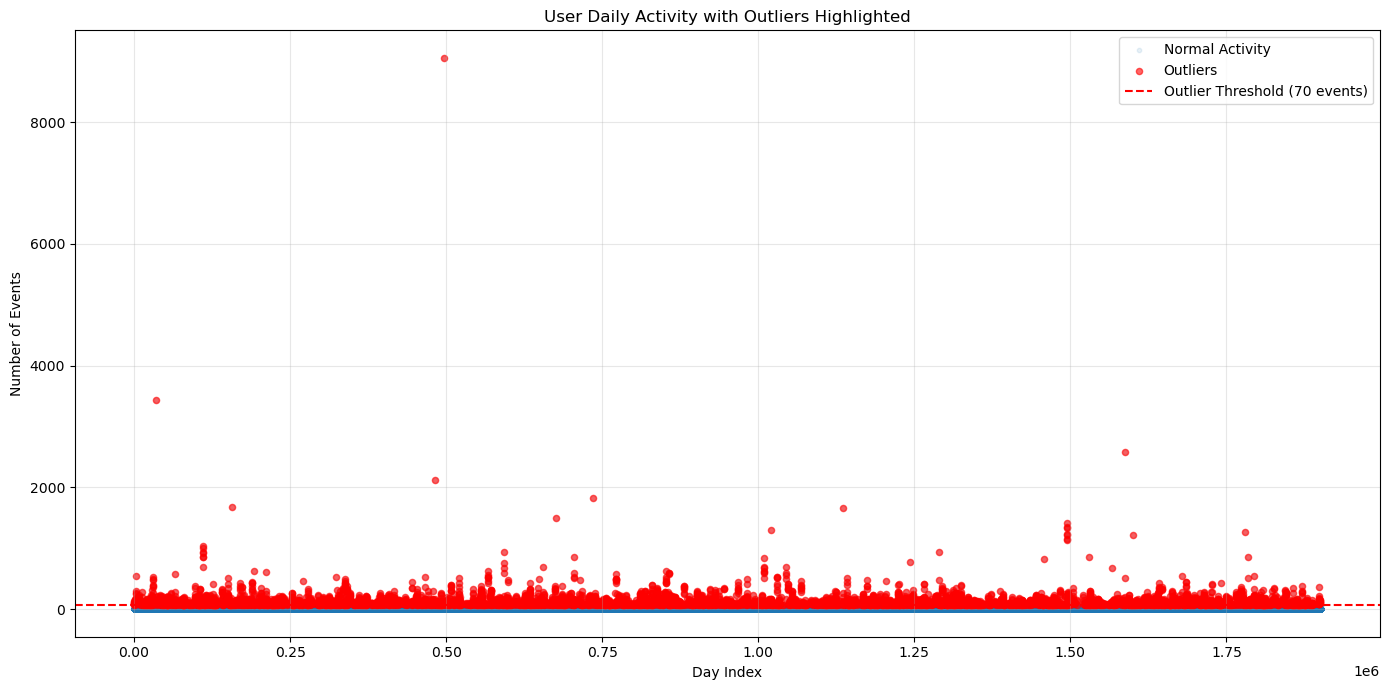


Event type distribution:
type
clicks    6292632
carts      570011
orders      65480

User activity statistics:
count    1,900,942
mean             4
std             13
min              1
25%              1
50%              1
75%              3
max          9,056

Detailed Activity Percentiles:
  0.1%: 1 events
  0.5%: 1 events
  1.0%: 1 events
  5.0%: 1 events
 10.0%: 1 events
 25.0%: 1 events
 50.0%: 1 events
 75.0%: 3 events
 90.0%: 7 events
 95.0%: 11 events
 99.0%: 34 events
 99.5%: 53 events
 99.9%: 132 events


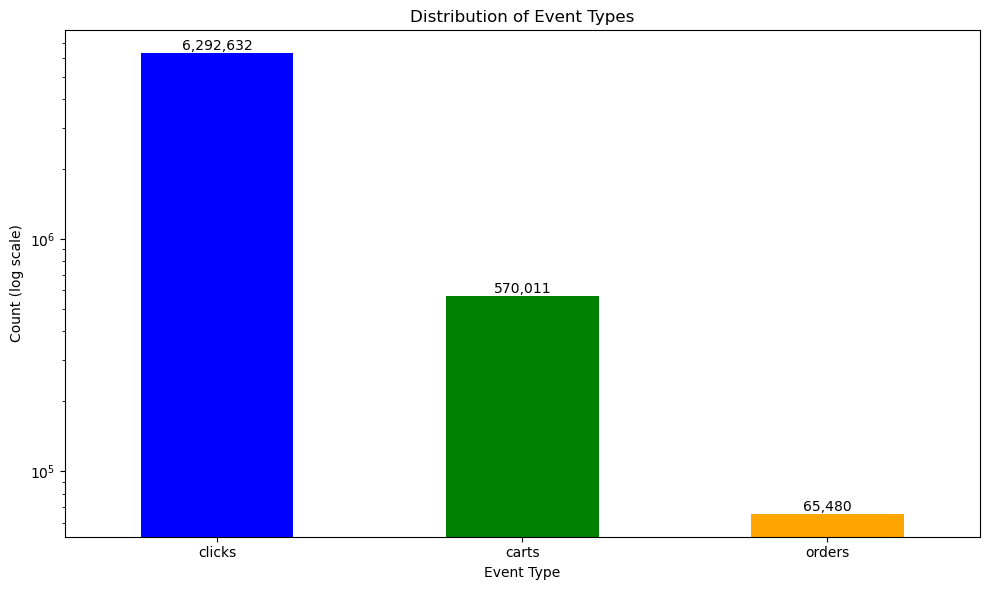

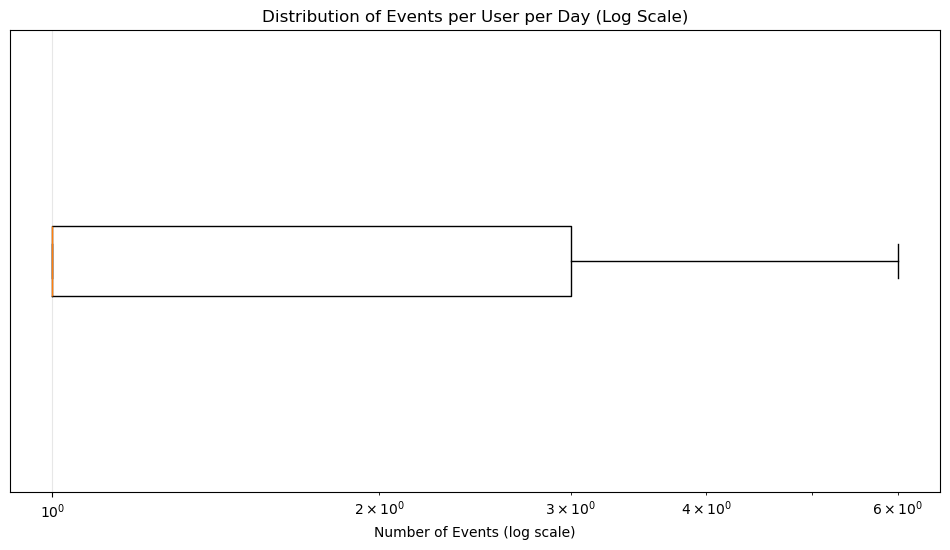


Top 20 Most Active User-Days:
     user       date total_events
  485,256 2022-08-30        9,056
   33,343 2022-08-30        3,438
1,551,213 2022-08-30        2,577
  471,073 2022-09-01        2,129
  717,965 2022-09-04        1,832
  152,547 2022-08-30        1,686
1,110,150 2022-08-31        1,663
  660,655 2022-08-30        1,506
1,460,571 2022-09-04        1,420
1,460,571 2022-08-31        1,344
1,460,571 2022-09-01        1,335
  995,962 2022-09-02        1,306
1,736,857 2022-08-30        1,262
1,460,571 2022-08-30        1,229
1,562,705 2022-08-30        1,225
1,460,571 2022-08-29        1,218
1,460,571 2022-09-02        1,159
1,460,571 2022-09-03        1,145
  108,125 2022-09-04        1,033
  108,125 2022-09-03        1,004

Outlier Statistics:
Number of outliers: 6,111
Percentage of total: 0.32%

Outliers by User:
user
1854775    7
247240     7
1778843    7
1643164    7
792097     7
1628974    7
798391     7
226413     7
799923     7
225619     7


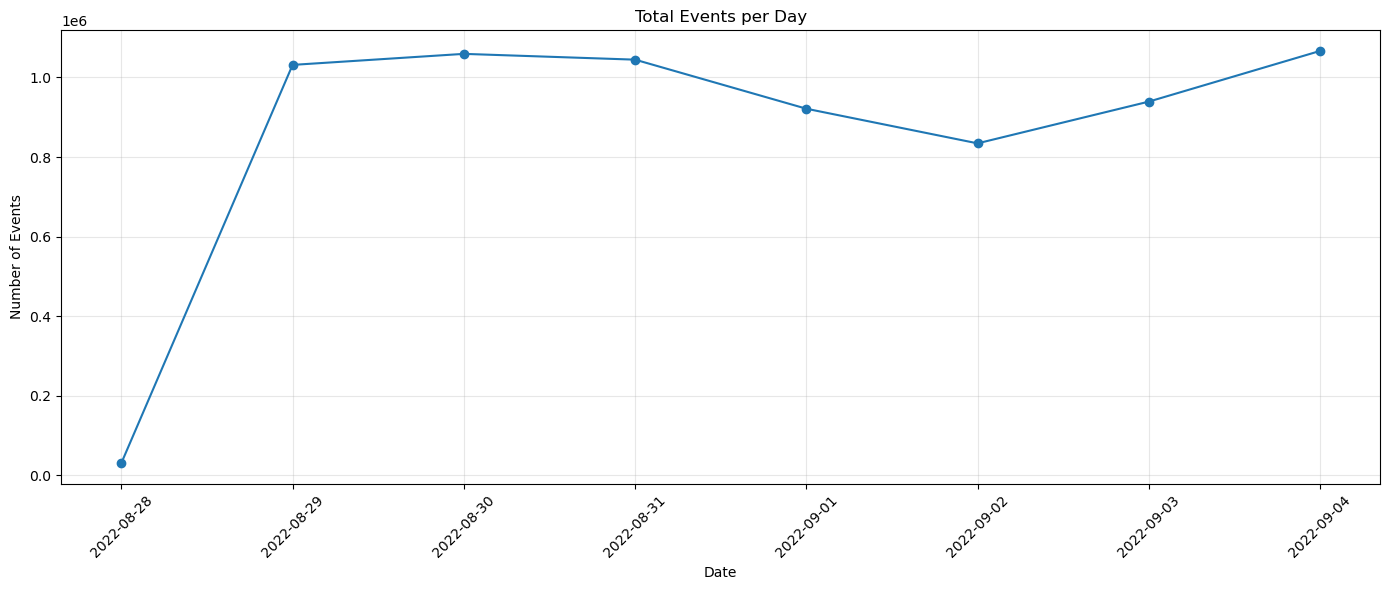

In [1]:
# Exercise 5: Outlier Detection in User Activity Data - Complete Solution with Documentation

# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

"""
1. DATA LOADING
This section loads the JSONL file containing user activity data.
- Uses json.loads() to parse each line of the JSONL file
- Converts the list of dictionaries into a pandas DataFrame
"""
file_path = "test.jsonl"
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

"""
2. DATA PREPROCESSING
This section processes the nested JSON structure and prepares the data for analysis.
- explode(): Converts the list of events into separate rows
- json_normalize(): Flattens the nested JSON structure in the 'events' column
- Combines the original data with the normalized event data
- Converts timestamps from milliseconds to datetime objects
- Extracts the date component for daily analysis
- Renames 'aid' to 'user' for clarity
"""
df_exploded = df.explode('events').reset_index(drop=True)
events_df = pd.json_normalize(df_exploded['events'])
df_combined = pd.concat([df_exploded.drop('events', axis=1), events_df], axis=1)
df_combined['ts'] = pd.to_datetime(df_combined['ts'], unit='ms')
df_combined['date'] = df_combined['ts'].dt.date
df_combined.rename(columns={'aid': 'user'}, inplace=True)

"""
3. USER ACTIVITY ANALYSIS
This section calculates various metrics about user activity.
- Groups data by user and date to count total events per user per day
- Creates a pivot table showing counts of each event type per user per day
- Uses unstack() to convert event types into columns for easier analysis
"""
user_daily_activity = df_combined.groupby(['user', 'date']).size().reset_index(name='total_events')
event_counts = df_combined.groupby(['user', 'date', 'type']).size().unstack(fill_value=0).reset_index()

"""
4. OUTLIER DETECTION
This section identifies unusual patterns in user activity.
- Calculates mean and standard deviation of daily events
- Defines outliers as values beyond 5 standard deviations from the mean
- Filters the DataFrame to show only outlier records
- Prints key statistics about the data and outliers
"""
mean_events = user_daily_activity['total_events'].mean()
std_events = user_daily_activity['total_events'].std()
threshold = mean_events + (5 * std_events)
outliers = user_daily_activity[user_daily_activity['total_events'] > threshold]

print(f"Mean events per day: {mean_events:.2f}")
print(f"Standard deviation: {std_events:.2f}")
print(f"Outlier threshold (5σ): {threshold:.2f}")
print(f"Number of outlier days found: {len(outliers)}")

"""
5. VISUALIZATION: USER ACTIVITY WITH OUTLIERS
This section creates visualizations to explore the data.
- Scatter plot showing all user-days with outliers highlighted
- Uses transparency and sizing for better visualization of dense data
- Adds a threshold line at 5 standard deviations
- Includes a legend and proper labels
"""
plt.figure(figsize=(14, 7))
plt.scatter(range(len(user_daily_activity)), 
           user_daily_activity['total_events'],
           alpha=0.1, s=10, label='Normal Activity')

if not outliers.empty:
    outlier_indices = user_daily_activity[user_daily_activity['total_events'] > threshold].index
    plt.scatter(outlier_indices, 
               user_daily_activity.loc[outlier_indices, 'total_events'],
               color='red', s=20, alpha=0.6, label='Outliers')

plt.axhline(y=threshold, color='r', linestyle='--', 
           label=f'Outlier Threshold ({threshold:.0f} events)')
plt.legend()
plt.title('User Daily Activity with Outliers Highlighted')
plt.xlabel('Day Index')
plt.ylabel('Number of Events')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

"""
6. STATISTICAL ANALYSIS
This section provides detailed statistics about the data.
- Shows distribution of different event types
- Provides descriptive statistics about user activity
- Includes percentile analysis for deeper insights
"""
print("\nEvent type distribution:")
print(df_combined['type'].value_counts().to_string())

print("\nUser activity statistics:")
stats = user_daily_activity['total_events'].describe()
stats_formatted = stats.apply(lambda x: f"{x:,.0f}" if pd.notnull(x) else "N/A")
print(stats_formatted.to_string())

print("\nDetailed Activity Percentiles:")
percentiles = [0.1, 0.5, 1, 5, 10, 25, 50, 75, 90, 95, 99, 99.5, 99.9]
percentile_values = np.percentile(user_daily_activity['total_events'], percentiles)
for p, val in zip(percentiles, percentile_values):
    print(f"{p:5.1f}%: {val:,.0f} events")

"""
7. VISUALIZATION: EVENT TYPE DISTRIBUTION
This section creates a bar chart showing the distribution of event types.
- Uses a log scale for the y-axis to handle wide-ranging values
- Adds value labels on top of each bar
- Formats the y-axis with thousands separators for better readability
"""
plt.figure(figsize=(10, 6))
ax = df_combined['type'].value_counts().plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=0)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.yscale('log')

for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

"""
8. VISUALIZATION: BOX PLOT
This section creates a box plot to show the distribution of events per user per day.
- Uses a log scale for the x-axis to better visualize the wide range of values
- Hides the y-axis ticks as they're not meaningful in this context
- Adds a grid for better readability
"""
plt.figure(figsize=(12, 6))
plt.boxplot(user_daily_activity['total_events'], vert=False, showfliers=False)
plt.xscale('log')
plt.title('Distribution of Events per User per Day (Log Scale)')
plt.xlabel('Number of Events (log scale)')
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.show()

"""
9. TOP ACTIVITIES AND OUTLIER ANALYSIS
This section provides detailed information about the most active user-days and outliers.
- Shows the top 20 most active user-days
- Provides statistics about the outliers
- Breaks down outliers by user to identify potential patterns
"""
print("\nTop 20 Most Active User-Days:")
top_activities = user_daily_activity.nlargest(20, 'total_events')
print(top_activities.to_string(index=False, formatters={
    'user': '{:,.0f}'.format,
    'date': str,
    'total_events': '{:,.0f}'.format
}))

if not outliers.empty:
    print("\nOutlier Statistics:")
    print(f"Number of outliers: {len(outliers):,}")
    print(f"Percentage of total: {len(outliers)/len(user_daily_activity)*100:.2f}%")
    print("\nOutliers by User:")
    print(outliers['user'].value_counts().head(10).to_string())

"""
10. TIME SERIES ANALYSIS
This section creates a time series plot of total events per day.
- Shows how activity varies over time
- Helps identify any temporal patterns or anomalies
- Uses markers to highlight individual data points
"""
daily_activity = user_daily_activity.groupby('date')['total_events'].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(daily_activity['date'], daily_activity['total_events'], marker='o', linestyle='-')
plt.title('Total Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Extra Code Sections
The code sections below are as follows:

1. Trying to determine the data structure of the JSONL file
2. Further analysis of the data structure regarding the events

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
"""
JSONL File Structure Explorer - Basic Version

This script helps explore the structure of a JSONL file by:
1. Loading the JSONL file
2. Converting it to a pandas DataFrame
3. Inspecting the first row and column names
4. Processing nested 'events' data if present
5. Converting timestamps and extracting dates

Usage:
    Simply update the 'file_path' variable to point to the JSONL file and run the script.
"""

# 1. Load the JSONL file
file_path = "test.jsonl"
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Convert to DataFrame and inspect the first row to understand the structure
df = pd.DataFrame(data)
print("First row of data:")
print(df.iloc[0])
print("\nColumn names:", df.columns.tolist())

# 2. Map the "events" dictionary to new columns
# First check if 'events' column exists
if 'events' in df.columns:
    # Check if events is a dictionary or string that needs to be loaded
    if isinstance(df['events'].iloc[0], str):
        df['events'] = df['events'].apply(json.loads)
    events_df = pd.json_normalize(df['events'])
    df = pd.concat([df.drop('events', axis=1), events_df], axis=1)
    
    # Print columns after expanding events
    print("\nColumns after expanding events:", df.columns.tolist())
    
    # 3. Convert timestamp to datetime and extract date
    if 'ts' in df.columns:
        df['ts'] = pd.to_datetime(df['ts'], unit='s')
        df['date'] = df['ts'].dt.date
    else:
        print("\nError: 'ts' column not found after processing events")
        print("Available columns:", df.columns.tolist())
else:
    print("\nError: 'events' column not found in the original data")
    print("Available columns:", df.columns.tolist())

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
"""
Advanced JSONL File Structure Explorer

This script provides a more detailed exploration of a JSONL file by:
1. Loading and parsing the JSONL file
2. Displaying the structure of nested events
3. Exploding events into separate rows
4. Identifying and analyzing event types
5. Searching for login-related activities

Usage:
    Update the 'file_path' variable to point to the JSONL file and run the script.
    The script will output detailed information about the file structure and contents.
"""

# 1. Load the JSONL file
file_path = "test.jsonl"
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# 2. Print the structure of the first event to understand the fields
print("First event structure:")
print(json.dumps(data[0]['events'][0], indent=2))

# 3. Explode the events list to get one row per event
df_exploded = df.explode('events').reset_index(drop=True)

# 4. Convert events dictionaries to columns
events_df = pd.json_normalize(df_exploded['events'])
df_combined = pd.concat([df_exploded.drop('events', axis=1), events_df], axis=1)

# 5. Print available columns to identify the correct ones
print("\nAvailable columns after processing:")
print(df_combined.columns.tolist())

# 6. Check unique event types if 'type' column exists
if 'type' in df_combined.columns:
    print("\nUnique event types:")
    print(df_combined['type'].value_counts())
    
# 7. If no 'type' column, print the first few rows to understand the structure
else:
    print("\nFirst few rows of data:")
    print(df_combined.head(3).to_string())

# 8. Let's assume we need to find login events - we'll look for any event that might indicate a login
# Common login indicators: 'login', 'signin', 'auth', etc.
# Let's check if any column contains these patterns
login_indicators = ['login', 'signin', 'auth', 'log_in', 'sign_in']
login_columns = [col for col in df_combined.columns if any(indicator in str(col).lower() for indicator in login_indicators)]

if login_columns:
    print("\nPossible login-related columns found:")
    print(login_columns)
    print("\nSample values from these columns:")
    for col in login_columns[:3]:  # Show first 3 login-related columns
        print(f"\n{col}:")
        print(df_combined[col].value_counts().head())
else:
    print("\nNo obvious login-related columns found. Here are all columns with their value counts:")
    for col in df_combined.columns:
        print(f"\n{col}:")
        print(df_combined[col].value_counts().head())

#### <p style=color:purple><b>Exercise 6:</b></p>
<p style=color:purple>Generate the same figure for exercise 5 and compare the two figures for outlier detection based on STD and LOF ! Which one is better at detecting anomalies and why?</p>

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for LOF
X = user_daily_activity[['total_events']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_scores = lof.fit_predict(X_scaled)
lof_outliers = user_daily_activity[lof_scores == -1]

# Add outlier flags to the original dataframe
user_daily_activity['is_std_outlier'] = user_daily_activity['total_events'] > threshold
user_daily_activity['is_lof_outlier'] = False
user_daily_activity.loc[lof_outliers.index, 'is_lof_outlier'] = True

# Create a figure with two subplots
plt.figure(figsize=(18, 8))

# 1. STD-based Outliers
plt.subplot(1, 2, 1)
sns.scatterplot(data=user_daily_activity, 
                x=user_daily_activity.index, 
                y='total_events',
                hue='is_std_outlier',
                palette={True: 'red', False: 'lightblue'},
                size='is_std_outlier',
                sizes={True: 60, False: 20},
                alpha=0.7)

plt.axhline(y=threshold, color='r', linestyle='--', 
           label=f'Threshold ({threshold:.0f} events)')
plt.title('STD-based Outlier Detection', fontsize=14, pad=15)
plt.xlabel('Day Index', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.legend(title='Outlier', labels=['Normal', 'Outlier', 'Threshold'])
plt.grid(True, alpha=0.3)

# 2. LOF-based Outliers
plt.subplot(1, 2, 2)
sns.scatterplot(data=user_daily_activity, 
                x=user_daily_activity.index, 
                y='total_events',
                hue='is_lof_outlier',
                palette={True: 'green', False: 'lightblue'},
                size='is_lof_outlier',
                sizes={True: 60, False: 20},
                alpha=0.7)

plt.title('LOF-based Outlier Detection', fontsize=14, pad=15)
plt.xlabel('Day Index', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.legend(title='Outlier', labels=['Normal', 'Outlier'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Comparison of Outlier Detection Methods', fontsize=16, y=1.02)
plt.show()

# Create a boxplot comparison
plt.figure(figsize=(14, 6))
sns.boxplot(data=user_daily_activity, 
            x='total_events', 
            y='is_std_outlier', 
            orient='h', 
            palette='viridis',
            order=[False, True])
plt.title('Distribution of Events: Normal vs. STD Outliers', fontsize=14, pad=15)
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Is Outlier?', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Create a violin plot for LOF outliers
plt.figure(figsize=(14, 6))
sns.violinplot(data=user_daily_activity, 
               x='total_events', 
               y='is_lof_outlier', 
               orient='h', 
               palette='viridis',
               order=[False, True])
plt.title('Distribution of Events: Normal vs. LOF Outliers', fontsize=14, pad=15)
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Is Outlier?', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Create a joint plot to show the relationship between the two methods
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_daily_activity,
                x=user_daily_activity.index,
                y='total_events',
                hue='is_std_outlier',
                style='is_lof_outlier',
                palette={True: 'red', False: 'lightblue'},
                s=60,
                alpha=0.7)
plt.axhline(y=threshold, color='r', linestyle='--', 
           label=f'STD Threshold ({threshold:.0f} events)')
plt.title('Comparison of Outlier Detection Methods', fontsize=14, pad=15)
plt.xlabel('Day Index', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.legend(title='Outlier Type', 
           labels=['STD Threshold', 'STD Normal', 'STD Outlier', 'LOF Normal', 'LOF Outlier'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

